### <b> Trabalho Final - Inteligência Computacional Aplicada (TIP7077) </b>
#### <b> Aluno: Carlos Eduardo Sousa Lima </b>
#### <b> Prof. Guilherme de Alencar Barreto </b>
***

#### <b>Questão 01 - Classificação de Padrões - MNIST database of handwritten digits </b>

<div style='text-align: justify;'>
As classes e funções apresentadas no bloco de código abaixo foram comuns a todos os classificadores implementados. Nelas, estão implementadas a leitura dos dados, adequação da codificação do vetor de saída (alvo) e normalização dos dados. A seguir, cada uma delas é melhor descrita:
</div>

- MNIST_data:<br>
    <div style='text-align: justify;'>
    
    Essa classe foi criada para conter as funções de aquisição dos dados de treino <b>get_train_data()</b> e dados de teste <b>get_test_data()</b>. Essas funções utilizam a biblioteca mnist (#https://pypi.org/project/python-mnist/#description), a qual, a partir dos dados obtidos em http://yann.lecun.org/exdb/mnist/index.html, descomprime e transforma-os em um objeto Numpy Array (np.array). Cada uma dessas funções retornam dois objetos np.array, um com os dados de entrada e o outro com seus respectivos labels. Os dados de entrada são retornados de forma vetorizada, ou seja, a matriz $28{\times}28$ é empilhada dando origem a um vetor $784{\times}1$. Os labels são o valor inteiro entre 0 e 9 que esse vetor representa.

    Cabe destacar que a base de dados de treino possuem 60.000 elementos e a de teste 10.000 elementos. Dessa forma, os dados de entrada formam uma matriz $60.000{\times}738$, para a base de treino, e $10.000{\times}738$, para a base de teste. Os labels, por sua vez, forma um vetor de $60.000{\times}1$, para a base de treino, e $10.000{\times}1$, para a base de teste</div>

    <div style='text-align: justify;' class="alert alert-block alert-info">
    
    Nota-se que cada elemento representa uma linha e suas características são ordenadas ao longo de suas colunas, o que diverge da ordenação empregada ao longo da disciplina. Optou-se por manter essa ordenação, assim, algumas operações matriciais podem apresentar uma ordem contrária à apresentada nas notas de aula, por exemplo:

    $\vec{y} = \tilde{W} \cdot \vec{x}$ (notas de aula)<br> 
    $\vec{y} = \vec{x} \cdot \tilde{W}$ (seguindo a notação adotada no trabalho)
    </div>


- one_hot_enconding():
    <div style='text-align: justify;'>
        
    Essa função altera o formato do vetor labels. Para cada elemento da base de dados de entrada do MNIST, seja a de treino ou de teste, existirá um label que representará o valor associado a esse elemento da base de dados. Tomando como exemplo os dados de treino, sua base de dados terá dimensão $60.000{\times}738$, visto que o procedimento de obtenção dos dados retorna esses dados de forma vetorizada. No caso dos seu respectivo vetor de label ($\vec{y}$), ele terá dimensão $60.000{\times}1$.

    Os possíveis valores de cada um dos elementos contidos no vetor de labels são representados por $x \in [0,9]$, tal que $x \in \Z$. A função aqui descrita, portanto, cria uma nova codificação para os labels baseada na codificação one-hot. Como $x$ pode assumir 10 valores (classes), cada elemento do vetor de labels dará origem a um vetor de cardinalidade igual 10. Portanto, após a aplicação dessa função, o vetor de label $\vec{y}$ passará a ter dimensão $60.000{\times}10$, para a base de treino, e $10.000{\times}10$, para a base de teste. 

    Esse vetor terá valor igual a 1 no índice que coincide com o valor representando no respectivo elemento do vetor de labels original, nos demais índices receberá o valor 0. Exemplificando, após a utilização da função one_hot_enconding(): <br>
    
    - $0 \rightarrow [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]$ <br>
    - $1 \rightarrow [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]$ <br>
    - $ \,\vdots \rightarrow \quad\quad\quad\quad\,\, \vdots$ <br>
    - $9 \rightarrow [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]$ <br>
    
    A utilização dessa codificação é interessante, pois assume que os vetores que representam cada classe são ortogonais entre si, ou seja, mutuamente exclusivos. 
    </div>


- norm_data():
    <div style='text-align: justify;'>

    A MNIST *database of handwritten digits* consiste na representação matricial de imagens de caracteres cursivos. Nessa representação, utiliza-se matrizes quadradas de dimensão $28{\times}28$, ou seja, cada imagem contém 784 pixels. Em cada um desses pixels, representasse uma tonalidade de cinza, considerando uma escala em que zero é totalmente branco e 255 totalmente preto.

    Como supracitado, cada uma dessas matrizes de dados são vetorizadas nas presente analises, dando origem a um vetor de dimensão $1{\times}p$. Agrupando esses vetores em linhas, obtém-se a matriz de dados de dimensão $n{\times}p$ utilizada nesse trabalho, sendo $n$ o número de imagens disponibilizadas para treino ou teste e $p = 784$. 

    A função nomr_data() atua normalizando os valores da escala de tons de cinza associados aos pixels das imagens de caracteres cursivos. Em outras palavras, para cada $n$ elemento da matriz de dados, seja de treino ou de teste, essa função varia intervalo de variação dos valores de $[0,255]$ para $[0,1]$. O processo de normalização é amplamente recomendado para algoritmos de classificação baseado em aprendizado, pois dados de entrada com elevados valores, ou que suas variáveis apresentem grandes diferença na magnitude dos seus valores, podem prejudicar o processo de aprendizado. Para normalização desses dados, adotou-se a seguinte equação:

    $$
        x^{norm}_{j} = \frac{x_{j} - x^{max}_{j}}{x^{max}_{j} - x^{min}_{j}}
    $$
    </div>
    


    


<p style="page-break-after:always;"></p>

In [1]:
import numpy as np
from mnist import MNIST #https://pypi.org/project/python-mnist/#description
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

class MNIST_data():

    def __init__(self):
        pass
    
    def get_train_data():
        
        mndata = MNIST("./")
        mndata.gz = True
        x, y = mndata.load_training()

        return (np.array(x), np.array(y))
    
    def get_test_data():
        
        mndata = MNIST("./")
        mndata.gz = True
        x, y = mndata.load_testing()

        return (np.array(x), np.array(y))

def one_hot_enconding(y, n):

    y_enc = np.zeros((y.shape[0], n))
    for i in range(y.shape[0]):
        y_enc[i, y[i]] = 1

    return y_enc

def norm_data(df):
    df_std = np.zeros(df.shape)

    for i in range(df.shape[0]):
        # df_std[i,:] = (df[i,:] - df[i,:].mean())/(df[i,:].std(ddof = std_ddof))
        df_std[i,:] = (df[i,:] - df[i,:].min())/(df[i,:].max() - df[i,:].min())
    return df_std

##### Avaliando o posto das matrizes dos dados de treino (X) e dados de teste (X_test)

In [10]:
X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
if np.linalg.matrix_rank(X) == min(X.shape):
    print("Dados de entrada (X) - Matriz de Posto Completo\n")
else:
    print("Dados de entrada (X) - Matriz de Posto Incompleto\n")
if np.linalg.matrix_rank(X_test) == min(X_test.shape):
    print("Dados de entrada (X_test) - Matriz de Posto Completo\n")
else:
    print("Dados de entrada (X_test) - Matriz de Posto Incompleto\n")


Dados de entrada (X) - Matriz de Posto Incompleto

Dados de entrada (X_test) - Matriz de Posto Incompleto



##### Classificador Linear de Mínimos Quadrados

In [3]:
# O código está utilizando a orientação nxp
# n é o número de amostras, p o número de característica
# As operações matriciais apresentam ordem contrária ao apresentando nas notas de aula
# Y = W*X (Nota de Aula) - Y = X*W (Presente Código)

Nr = 5
X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

tx_ok = np.zeros(Nr)
for r in range(Nr):
    rand_index = np.random.permutation(X.shape[0])
    X = X[rand_index,:]
    Y = Y[rand_index,:]

    if X.shape[0] != X.shape[1]:
        W = np.linalg.lstsq(X,Y)[0]
    else:
        W = np.linalg.solve(X,Y)[0]


    Y_mod = np.dot(X_test, W)
    count_ok = 0

    for j in range(Y_mod.shape[0]):
        if Y_mod[j,:].argmax() == Y_test[j,:].argmax():
            count_ok += 1
    
    tx_ok[r] = count_ok/Y_mod.shape[0]
    print("Rodada {} - Taxa de Acerto = {:.2%}".format(r+1, tx_ok[r]))

print('''
Taxa de acerto Média = {:.2%}
Taxa de erro Média = {:.2%}
Melhor Taxa de Acerto = {:.2%}
Pior Taxa de Acerto = {:.2%}
Desv. Pad. Taxa de Acerto = {:.2%}
'''.format(tx_ok.mean(), 1-tx_ok.mean(),
    tx_ok.max(), tx_ok.min(), tx_ok.std()))


Rodada 1 - Taxa de Acerto = 85.32%
Rodada 2 - Taxa de Acerto = 85.28%
Rodada 3 - Taxa de Acerto = 85.32%
Rodada 4 - Taxa de Acerto = 85.32%
Rodada 5 - Taxa de Acerto = 85.31%

Taxa de acerto Média = 85.31%
Taxa de erro Média = 14.69%
Melhor Taxa de Acerto = 85.32%
Pior Taxa de Acerto = 85.28%
Desv. Pad. Taxa de Acerto = 0.02%



<div style='text-align: justify;'>
    
De acordo com LeCun *et al.* (1998), o classificador linear baseado em uma rede neural de uma camada (*1-layer NN*), Perceptron Simples???, obteve uma taxa de erro de 12.00% com a base de dados de teste, considerando nenhum pré-processamento desses dados.

O Classificador Linear de Mínimos Quadrados (CLMQ), por sua vez, apresenta um desempenho similar, com uma taxa de erro média de 14.67%. O desempenho desse classificado foi considerado satisfatório e evidencia que esse problema de classificação pode ser resolvido satisfatoriamente por uma superfície de decisão linear, ou seja, um problema linearmente separável.

Destaca-se que a operação para determinação da matriz $\tilde{W}$ utilizou o método de eliminação de Gauss, não sendo necessário a inversão explícita de $\tilde{X}\tilde{X}^{T}$. Como apresentado, as matrizes de dados de entrada para treino e teste possuem posto incompleto, logo haveria problema nessa inversão explícita supracitada.

Destaca-se, também, que o método de eliminação de Gauss possui um menor custo de processamento, sendo eficiente para dados de alta dimensão, como os utilizados no presente trabalho.

<div>

<div style='text-align: justify;'>
<font size="2.5">
LeCu, Y.; Bottou, L.; Bengio, Y. and Haffner, P. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.
</font>
<div>


***

##### Perceptron Logístico

Rodada 1 - Taxa de acerto = 91.68%

Taxa de acerto Média = 91.68%
Taxa de erro Média = 8.32%
Melhor Taxa de Acerto = 91.68%
Pior Taxa de Acerto = 91.68%
Desv. Pad. Taxa de Acerto = 0.00%



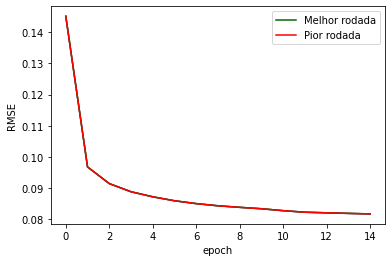

In [20]:
def act_fun(u, fun):

    if fun == "step":
        u[np.where(u >= 0)] = 1
        u[np.where(u < 0)] = 0

    elif fun == "tanh":
        u = np.array(list(map(lambda x: (1-np.exp(-x))/(1+np.exp(-x)), u)))
    
    elif fun == "log":
        u = np.array(list(map(lambda x: 1/(1+np.exp(-x)), u)))
    
    return u 

# O código está utilizando a orientação nxp
# n é o número de amostras, p o número de característica
# As operações matriciais apresentam ordem contrária ao apresentando nas notas de aula
# Y = W*X (Nota de Aula) - Y = X*W (Presente Código)

X, Y = MNIST_data.get_train_data()
X_test, Y_test = MNIST_data.get_test_data()
    
Y = one_hot_enconding(Y, 10)
Y_test = one_hot_enconding(Y_test, 10)

X = norm_data(X)
X_test = norm_data(X_test)

Nr = 1
fun_type = "log"
eta = 0.01
Ne = 15
tx_ok = np.empty((Nr))
best_run = {"Acc": 0, "RMSE": 0, "W": 0}
worst_run = {"Acc": 1, "RMSE": 0, "W": 0}
if fun_type == "tanh":
    #codificação da saída fica -1 e 1 para tangente hiperbólica
    Y[Y == 0] = -1
    Y_test[Y == 0] = -1

fig, ax = plt.subplots()
for r in range(Nr):
    #Não embaralhei a cada rodada, pois os dados de treino sempre serão X e Y
    #Assim, como não haverá split do conjunto em dados de treino e teste
    #Decidi embaralhar só dentro de cada época
    #Inicialização aleatória dos pesos

    W = np.random.rand(Y.shape[1], X.shape[1]+1)
    RMSE_ep = np.full(Ne, np.nan)
    
    for ep in range(Ne):
        #Embaralhamento da matriz de dados saída
        rand_index = np.random.permutation(X.shape[0])
        X = X[rand_index, :]
        Y = Y[rand_index, :]
        RMSE = 0
        for i in range(X.shape[0]):
            x = np.append(-1, X[i,:]) #add bias
            U = np.dot(W, x)
            y = act_fun(U, fun_type)
            err = Y[i,:] - y

            x = np.expand_dims(x, 1)
            err = np.expand_dims(err, 1)

            RMSE = RMSE + 0.5*np.power(err, 2).sum()
            W = W + eta*np.dot(err, x.T)
        
        RMSE_ep[ep] = RMSE/X.shape[0]

    ax.plot(RMSE_ep)

    count = 0
    for j in range(X_test.shape[0]):
        x = np.append(-1, X_test[j,:])
        U = np.dot(W, x)
        y = act_fun(U, fun_type)

        if Y_test[j,:].argmax() == y.argmax():
            count += 1

    tx_ok[r] = count/X_test.shape[0]

    print("Rodada {} - Taxa de acerto = {:.2%}".format(r+1, tx_ok[r]))

    if tx_ok[r] > best_run["Acc"]:
        best_run["Acc"], best_run["RMSE"], best_run["W"] = (tx_ok[r], RMSE_ep, W)


    if tx_ok[r] < worst_run["Acc"]:
        worst_run["Acc"], worst_run["RMSE"], worst_run["W"] = (tx_ok[r], RMSE_ep, W)

ax.plot(best_run["RMSE"], label = "Melhor rodada", c = "darkgreen")
ax.plot(worst_run["RMSE"], label = "Pior rodada", c = "red")
ax.set_ylabel("RMSE")
ax.set_xlabel("epoch")
ax.legend()
print('''
Taxa de acerto Média = {:.2%}
Taxa de erro Média = {:.2%}
Melhor Taxa de Acerto = {:.2%}
Pior Taxa de Acerto = {:.2%}
Desv. Pad. Taxa de Acerto = {:.2%}
'''.format(tx_ok.mean(), 1-tx_ok.mean(),
    tx_ok.max(), tx_ok.min(), tx_ok.std()))

In [18]:
print(RMSE_ep)

[0.14524289 0.09672172 0.09144827 0.08870541 0.08722094 0.08613941
 0.08529313 0.08419684 0.08389694 0.08334575 0.08256829 0.08244846
 0.08228141 0.0818618  0.08169757 0.08144612 0.08119435 0.08098104
 0.08106622 0.08077524 0.08077238 0.0805767  0.08035836 0.08016898
 0.0799892  0.08020665 0.07998921 0.08002224 0.0794258  0.07977588
 0.07976768 0.07936634 0.07939778 0.07961154 0.0796241  0.07927355
 0.07911501 0.07936106 0.07914394 0.07919197 0.07910841 0.07905815
 0.07880537 0.07898826 0.07897827 0.07866818 0.07874927 0.07891939
 0.07874519 0.07860309]


***

<div class="alert alert-block alert-warning">
S2
</div>

<div class="alert alert-block alert-info">
S2
</div>

<div class="alert alert-block alert-success">
S2
</div>

<div class="alert alert-block alert-danger">
S2
</div>